In [ ]:
!pip install git+https://github.com/openai/CLIP.git
!pip install transformers
!pip install pillow-avif-plugin
!pip install open_clip_torch
!pip install -U llama-index-embeddings-huggingface

  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-fm9rvmi2
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-fm9rvmi2
  Resolved https://github.com/openai/CLIP.git to commit dcba3cb2e2827b402d2701e7e1c7d9fed8a20ef1
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 127.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 99.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 51.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
# Download and extract the data and learn_decoder.py
# !wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1xZaorRH-xxjfochvSesAhOTUg82_Xq56' -O- | sed -rn 's/.confirm=([0-9A-Za-z_]+)./\1\n/p')&id=1xZaorRH-xxjfochvSesAhOTUg82_Xq56" -O files.zip && rm -rf /tmp/cookies.txt
!wget --header="Host: drive.usercontent.google.com" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,/;q=0.8,application/signed-exchange;v=b3;q=0.7" --header="Accept-Language: en-US,en;q=0.9,he;q=0.8" --header="Cookie: HSID=AHJfxja1o67aaDDKP; SSID=AcFaYUEeiC88MwrF9; APISID=-FXvHmBvJ828Jrpq/AaIp_RI6gKwBAA-zy; SAPISID=_psqReiv0O2WdiVv/AhLpZThJtVNAPgAJP; __Secure-1PAPISID=_psqReiv0O2WdiVv/AhLpZThJtVNAPgAJP; __Secure-3PAPISID=_psqReiv0O2WdiVv/AhLpZThJtVNAPgAJP; S=billing-ui-v3=pX9aAWC8SzxQZfQvQ-0SbCFRz65PPkVY:billing-ui-v3-efe=pX9aAWC8SzxQZfQvQ-0SbCFRz65PPkVY:maestro=dsv3G-owxPD6uTATLH0lBQZNadhFo6ZKJiuB9usoQVU; __Secure-BUCKET=CPgG; SID=g.a000kggtmVDh8D92rqHe5fiG-bMoXQw7Ld8Tf_C8qHhSE2ZoFUyx_uObP_F4bCqI8I561ccGMwACgYKAWESARQSFQHGX2Mi5DnhBiJ2gjjbMSP0XJbU5BoVAUF8yKrlBjWMdNOfGnmA7TZzmbWD0076; __Secure-1PSID=g.a000kggtmVDh8D92rqHe5fiG-bMoXQw7Ld8Tf_C8qHhSE2ZoFUyx2BFINS8lXhFUyAFwuvl8CQACgYKAW4SARQSFQHGX2MiWd6bHkI0JN89-1dFZUbS2hoVAUF8yKpc-H3AD8N6tj-dmFG21SeE0076; __Secure-3PSID=g.a000kggtmVDh8D92rqHe5fiG-bMoXQw7Ld8Tf_C8qHhSE2ZoFUyxJl_TGsCsjeiVN72q3lSCWQACgYKASASARQSFQHGX2MiULluXa7aABDwxgCWjB6IyhoVAUF8yKoy_HHYLCqIFMwNjx-GwYWe0076; __Secure-ENID=20.SE=jyM_w2hA8DW6FvPOh9wudde93a0A9P41Epzo098LV_LyU79-VVcJ9K-vNLrhCLuVzi69CyV4RxlSls8AAT9J8odwIXi_ISVn8Z1U1DH52BC3YiwOwO9LKUsBesCbGx2D6u1XwZ5GIP_PZMo1tkLLJq2VCtcxRP9OtC_QgHNbAD4eyc1TTu1C8XbZLFTOIgb0k9IfM2bMBXeha6t3sJysARZWpDIzs3I8wWZ5JtABB253grtjQyCnxyy9MUgTcYAVaoEGwgVHV4V4lSY6gydFkO2gYxl7JqYloqCq74HahGK54TBlsGZIOTM_KvFAsIidcrPaVOBpH6IGQTPChxy3Tr-GLK7VpBiQ8JW7V0xC8XTN1crEaaZnGFQ6MrjDv8f3hCY0Kg; AEC=AQTF6HwEtUB747fVHMzvOWJV9pmRoGs8Ix8FJ1HTrxbE9NY1dtyro2AvNQ; NID=515=Wdt0NWZqVSh3TtdIfjXCGTCCkj7jaJjt-lkOL3hLD_hPSSMyGxKkVthECwGGFbbxmvfM2iKZ1SkPGDVgLwjghAOrV9Ya7iEJJ0eSXZSfszc0WxRXm3Jy6LxqPEZLmY8v3AIkMX-o8KE5ZRXGEzgv_s9pfgS8bmeiIGT13Iiyw9tPzRZDChGijNbZ0Mp1oF-4YKikOZCyo8Km9wXOgLAC9dbeIqAlTdER97cQ7B5GajyRLH_bFrg0lCVN4tyZEycjihHOu6Eq_V88rswgV7uvzemJ_yk4WbbIWJVm9NCO4tWdDQG8NY3EY57xAJbmIhu260jDftYwzjCnpqJ8C1iCm-FjboF6xJwKJEtLkCXagIcSWxfPGqRWIn5KY72ogAMZTlUZ5RE5F8bH4sFgkt5pW_AalY5mxYPOfZgF-9hcJYsF71rMOic6mqSfvR8iNo-k6_SZ-4o5WkYxbwdLgiaIOiCJHkhIGBoXsm5hh5BHDqlk5ERGnFn5zpqOguNLJFjXT3nhaP1g_a2fFvd0bmZw2A9Y6tBNAC7CbDOmSHSmYmLag0qVcqu286CZh5svuhdM-QPcSCt5u0kPgfWN3KBha0G9L9qCiDIwntvnlVNoUYLBM4je1bhGjO9M2tdH_vteLo4vjm9Cq-4I2A; __Secure-1PSIDTS=sidts-CjIB3EgAEi6AJoaJlu_IOdqmparuSFUne3RqD5YKK5hcqKjRlc0CTp9lSpyH2OoVVoqmlxAA; __Secure-3PSIDTS=sidts-CjIB3EgAEi6AJoaJlu_IOdqmparuSFUne3RqD5YKK5hcqKjRlc0CTp9lSpyH2OoVVoqmlxAA; SIDCC=AKEyXzW7IJ8miV8hX_pqzqqPW7--eMWuWfausspLBoDPlfZDCRZDED56ohpancLYOBPizfUzi1aM; __Secure-1PSIDCC=AKEyXzVGnmSuG07J22njRVFPQ_sk88MgnqtYxJd-M0_9Pz3jdh4GpGPhPOqCMrayTU9SJTW3n54; __Secure-3PSIDCC=AKEyXzVScJYbKdtIImPYKpTRkExsc5UhC5n9Rkk8wNFlMZNW3_xkvWlimAXWaZ4T7kTcJy5AE4I" --header="Connection: keep-alive" "https://drive.usercontent.google.com/download?id=1xZaorRH-xxjfochvSesAhOTUg82_Xq56&export=download&authuser=0&confirm=t&uuid=efeb9ce5-a5c5-453b-938d-6c0ece963f3c&at=APZUnTV18b5mSao0MQ2JbtpefTxr%3A1719665236172" -c -O 'files.zip'
!unzip files.zip
!rm files.zip

--2025-06-29 11:32:30--  https://drive.usercontent.google.com/download?id=1xZaorRH-xxjfochvSesAhOTUg82_Xq56&export=download&authuser=0&confirm=t&uuid=efeb9ce5-a5c5-453b-938d-6c0ece963f3c&at=APZUnTV18b5mSao0MQ2JbtpefTxr%3A1719665236172
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 173.194.195.132, 2607:f8b0:4001:c11::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|173.194.195.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 97708666 (93M) [application/octet-stream]
Saving to: ‘files.zip’

files.zip           100%[===================>]  93.18M   175MB/s    in 0.5s    

2025-06-29 11:32:32 (175 MB/s) - ‘files.zip’ saved [97708666/97708666]

Archive:  files.zip
replace stimuli_180concepts.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: stimuli_180concepts.txt  
replace learn_decoder.py? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: learn_decoder.py        
replace vectors_180concepts.GV42B

In [ ]:
!unzip IARPA_expt1_stim_images.zip

Archive:  IARPA_expt1_stim_images.zip
   creating: images/
  inflating: images/.DS_Store        
   creating: __MACOSX/
   creating: __MACOSX/images/
  inflating: __MACOSX/images/._.DS_Store  
   creating: images/Ability/
  inflating: images/Ability/ability_1.jpg  
   creating: __MACOSX/images/Ability/
  inflating: __MACOSX/images/Ability/._ability_1.jpg  
  inflating: images/Ability/ability_2.jpg  
  inflating: __MACOSX/images/Ability/._ability_2.jpg  
  inflating: images/Ability/ability_3.jpg  
  inflating: __MACOSX/images/Ability/._ability_3.jpg  
  inflating: images/Ability/ability_4.jpg  
  inflating: __MACOSX/images/Ability/._ability_4.jpg  
  inflating: images/Ability/ability_5.jpg  
  inflating: __MACOSX/images/Ability/._ability_5.jpg  
  inflating: images/Ability/ability_6.jpg  
  inflating: __MACOSX/images/Ability/._ability_6.jpg  
  inflating: __MACOSX/images/._Ability  
   creating: images/Accomplished/
  inflating: images/Accomplished/accomplished_1.jpg  
   creating: __MA

In [ ]:
concept_categories = {
    "People & Roles": [
        "Doctor", "Driver", "Student", "King", "Lady", "Professional", "Liar", "Suspect", "Job"
    ],
    "Cognitive / Emotional States": [
        "Ability", "Accomplished", "Angry", "Attitude", "Emotion", "Emotionally", "Feeling", "Great",
        "Help", "Hurting", "Impress", "Kindness", "Laugh", "Personality", "Sad", "Smart", "Smiling",
        "Stupid", "Successful", "Typical", "Unaware", "Willingly", "Ignorance"
    ],
    "Relationships / Social Concepts": [
        "Argument", "Argumentatively", "Charity", "Marriage", "Relationship", "Religious", "Sin",
        "Protection", "Obligation", "Law"
    ],
    "Objects & Things": [
        "Bag", "Ball", "Bar", "Bed", "Beer", "Camera", "Clothes", "Cockroach", "Computer", "Device",
        "Gold", "Gun", "Hair", "Light", "Medication", "Money", "Picture", "Pig", "Plant", "Ship",
        "Sign", "Skin", "Star", "Sugar", "Table", "Tool", "Toy", "Tree"
    ],
    "Places & Structures": [
        "Apartment", "Building", "Construction", "Jungle", "Land", "Mountain", "Nation", "Residence", "Road"
    ],
    "Food & Drink": [
        "Beer", "Dessert", "Dinner", "Fish", "Food", "Garbage", "Seafood", "Sugar", "Taste"
    ],
    "Art, Media, Entertainment": [
        "Art", "Dance", "Movie", "Music", "Show"
    ],
    "Processes / Actions": [
        "Beat", "Burn", "Challenge", "Cook", "Counting", "Damage", "Deceive", "Dedication",
        "Deliberately", "Delivery", "Dig", "Dissolve", "Disturb", "Do", "Movement", "Plan", "Play",
        "Reaction", "Read", "Sell", "Sew", "Spoke", "Trial", "Tried", "Wash", "Wear"
    ],
    "Abstract / Conceptual": [
        "Business", "Code", "Collection", "Economy", "Election", "Electron", "Elegance", "Event",
        "Experiment", "Invention", "Investigation", "Invisible", "Level", "Magic", "Material",
        "Mathematical", "Mechanism", "Philosophy", "Quality", "Science", "Shape", "Solution",
        "Soul", "Sound", "Texture", "Time", "Usable", "Useless", "Word"
    ],
    "Risk, Danger, & Health": [
        "Blood", "Body", "Broken", "Dangerous", "Disease", "Illness", "Pain", "War", "Weak"
    ]
}

In [ ]:
import os
import torch
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from tqdm import tqdm
from sklearn.metrics.pairwise import cosine_similarity
from collections import defaultdict

# New import
from llama_index.embeddings.huggingface import HuggingFaceEmbedding


In [ ]:
class UnifiedEncoder:
    def __init__(self, encoder_type, include_text=False):
        self.encoder_type = encoder_type
        self.include_text = include_text
        self.device = "cuda" if torch.cuda.is_available() else "cpu"

        if encoder_type == "clip":
            import clip
            self.model, self.preprocess = clip.load("ViT-B/32", device=self.device)
            self.model.to(self.device)

        elif encoder_type == "openclip":
            import open_clip
            self.model, _, self.preprocess = open_clip.create_model_and_transforms(
                "ViT-H-14", pretrained="laion2b_s32b_b79k"
            )
            self.model.to(self.device)

        elif encoder_type == "siglip":
            from transformers import AutoProcessor, AutoModel
            self.processor = AutoProcessor.from_pretrained("google/siglip-base-patch16-224")
            self.model = AutoModel.from_pretrained("google/siglip-base-patch16-224").to(self.device)

        elif encoder_type == "vdr":
            self.model = HuggingFaceEmbedding(
                model_name="llamaindex/vdr-2b-multi-v1",
                device=self.device,
                trust_remote_code=True
            )

        elif encoder_type == "blip2":
            from transformers import Blip2Processor, Blip2Model
            self.processor = Blip2Processor.from_pretrained("Salesforce/blip2-opt-2.7b")
            self.model = Blip2Model.from_pretrained("Salesforce/blip2-opt-2.7b").to(self.device)

        elif encoder_type == "resnet":
            import torchvision.models as models
            import torchvision.transforms as transforms
            self.model = models.resnet50(pretrained=True).to(self.device)
            self.model.eval()
            self.preprocess = transforms.Compose([
                transforms.Resize(256),
                transforms.CenterCrop(224),
                transforms.ToTensor(),
                transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                     std=[0.229, 0.224, 0.225]),
            ])

        elif encoder_type == "dinov2":
            from transformers import AutoImageProcessor, AutoModel
            self.processor = AutoImageProcessor.from_pretrained("facebook/dinov2-base")
            self.model = AutoModel.from_pretrained("facebook/dinov2-base").to(self.device)

        else:
            raise ValueError(f"Unknown encoder type: {encoder_type}")

    def encode_image(self, image_path):
        image = Image.open(image_path).convert("RGB")
        if self.encoder_type in ["clip", "openclip"]:
            image_tensor = self.preprocess(image).unsqueeze(0).to(self.device)
            with torch.no_grad():
                emb = self.model.encode_image(image_tensor)
                emb = emb / emb.norm(dim=-1, keepdim=True)
            return emb.cpu().numpy().squeeze()

        elif self.encoder_type == "siglip":
            inputs = self.processor(images=image, return_tensors="pt").to(self.device)
            with torch.no_grad():
                emb = self.model.get_image_features(**inputs)
                emb = emb / emb.norm(dim=-1, keepdim=True)
            return emb.cpu().numpy().squeeze()

        elif self.encoder_type == "vdr":
            return np.array(self.model.get_image_embedding(image)).squeeze()

        elif self.encoder_type == "blip2":
            inputs = self.processor(images=image, return_tensors="pt").to(self.device)
            with torch.no_grad():
                emb = self.model.vision_model(**inputs).last_hidden_state.mean(dim=1)
            return emb.cpu().numpy().squeeze()

        elif self.encoder_type == "resnet":
            image_tensor = self.preprocess(image).unsqueeze(0).to(self.device)
            with torch.no_grad():
                emb = self.model(image_tensor)
            return emb.cpu().numpy().squeeze()

        elif self.encoder_type == "dinov2":
            inputs = self.processor(images=image, return_tensors="pt").to(self.device)
            with torch.no_grad():
                emb = self.model(**inputs).last_hidden_state.mean(dim=1)
            return emb.cpu().numpy().squeeze()

    def encode_text(self, text):
        if not self.include_text:
            raise RuntimeError(f"Text encoding is disabled for encoder: {self.encoder_type}")

        with torch.no_grad():
            if self.encoder_type == "clip":
                import clip
                tokens = clip.tokenize([text]).to(self.device)
                emb = self.model.encode_text(tokens)

            elif self.encoder_type == "openclip":
                import open_clip
                tokenizer = open_clip.get_tokenizer("ViT-H-14")
                tokens = tokenizer([text]).to(self.device)
                emb = self.model.encode_text(tokens)

            elif self.encoder_type == "siglip":
                inputs = self.processor(text=[text], return_tensors="pt").to(self.device)
                emb = self.model.get_text_features(**inputs)

            elif self.encoder_type == "vdr":
                return np.array(self.model.get_query_embedding(text)).squeeze()

            else:
                raise ValueError(f"Text encoding not supported for encoder: {self.encoder_type}")

            emb = emb / emb.norm(dim=-1, keepdim=True)
            return emb.cpu().numpy().squeeze()


# ===============================
# DATA LOADING AND UTILITIES
# ===============================
def load_concepts(file):
    with open(file, "r") as f:
        return [line.strip() for line in f if line.strip()]

def load_embeddings(concepts, encoder, image_root="images"):
    img_embs, txt_embs = {}, {}
    for concept in tqdm(concepts, desc=f"Encoding with {encoder.encoder_type}"):
        folder = os.path.join(image_root, concept)
        if not os.path.isdir(folder): continue
        image_vecs = []
        for fname in sorted(os.listdir(folder)):
            if fname.lower().endswith((".jpg", ".jpeg", ".png", ".avif")):
                try:
                    image_vecs.append(encoder.encode_image(os.path.join(folder, fname)))
                except:
                    continue
        if image_vecs:
            img_embs[concept] = np.mean(image_vecs, axis=0)
            if encoder.include_text:
                txt_embs[concept] = encoder.encode_text(concept)
    return img_embs, txt_embs if encoder.include_text else None

# ===============================
# EVALUATION
# ===============================
def compute_metrics(data, vectors, concepts, decoder_func, k=18, fold_size=10):
    all_ranks, top5s, mrrs = [], [], []
    for i in range(k):
        test_idx = np.arange(i * fold_size, (i + 1) * fold_size)
        train_idx = np.setdiff1d(np.arange(len(concepts)), test_idx)
        decoder = decoder_func(data[train_idx], vectors[train_idx])
        predicted = data[test_idx] @ decoder
        for j, idx in enumerate(test_idx):
            sim = cosine_similarity(predicted[j].reshape(1, -1), vectors).flatten()
            rank = np.argsort(-sim).tolist().index(idx) + 1
            all_ranks.append(rank)
            top5s.append(rank <= 5)
            mrrs.append(1.0 / rank)
    return np.mean(all_ranks), np.mean(top5s) * 100, np.mean(mrrs), all_ranks


# ===============================
# MAIN PIPELINE
# ===============================
if __name__ == "__main__":
    from learn_decoder import read_matrix, learn_decoder

    concepts = load_concepts("images/images_concepts.txt")
    brain_data = read_matrix("imaging_data.csv", sep=",")

    image_only_models = ["blip2", "resnet", "dinov2"]
    multimodal_models = ["clip", "openclip", "siglip", "vdr"]

    image_results, all_ranks_img = {}, {}
    multimodal_results, all_ranks_mm = {}, {}

    # Image-only models
    for model in image_only_models:
        encoder = UnifiedEncoder(model, include_text=False)
        img_embs, _ = load_embeddings(concepts, encoder)
        vectors = np.stack([img_embs[c] for c in concepts])
        avg_rank, top5, mrr, all_ranks = compute_metrics(brain_data, vectors, concepts, learn_decoder)
        image_results[model] = (avg_rank, top5, mrr)
        all_ranks_img[model] = all_ranks

    # Multimodal models
    for model in multimodal_models:
        encoder = UnifiedEncoder(model, include_text=True)
        img_embs, txt_embs = load_embeddings(concepts, encoder)
        image_vecs = np.stack([img_embs[c] for c in concepts])
        text_vecs = np.stack([txt_embs[c] for c in concepts])
        combo_vecs = 0.5 * image_vecs + 0.5 * text_vecs if image_vecs.shape[1] == text_vecs.shape[1] else None

        result = {}
        for name, vecs in zip(["image", "text", "combo"], [image_vecs, text_vecs, combo_vecs]):
            if vecs is None: continue
            avg_rank, top5, mrr, all_ranks = compute_metrics(brain_data, vecs, concepts, learn_decoder)
            result.setdefault("Average Rank", {})[name] = avg_rank
            result.setdefault("Top-5 Accuracy", {})[name] = top5
            result.setdefault("MRR", {})[name] = mrr
            all_ranks_mm[f"{model}_{name}"] = all_ranks
        multimodal_results[model] = result



Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/432 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/882 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

added_tokens.json:   0%|          | 0.00/23.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/548 [00:00<?, ?B/s]

processor_config.json:   0%|          | 0.00/68.0 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

model.safetensors.index.json: 0.00B [00:00, ?B/s]

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/10.0G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/4.98G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Encoding with blip2: 100%|██████████| 180/180 [2:26:07<00:00, 48.71s/it]
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:01<00:00, 102MB/s]
Encoding with resnet: 100%|██████████| 180/180 [03:03<00:00,  1.02s/it]


preprocessor_config.json:   0%|          | 0.00/436 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


config.json:   0%|          | 0.00/548 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

Encoding with dinov2: 100%|██████████| 180/180 [11:56<00:00,  3.98s/it]
100%|███████████████████████████████████████| 338M/338M [00:09<00:00, 35.9MiB/s]
Encoding with clip: 100%|██████████| 180/180 [03:38<00:00,  1.21s/it]


open_clip_model.safetensors:   0%|          | 0.00/3.94G [00:00<?, ?B/s]

Encoding with openclip: 100%|██████████| 180/180 [1:25:50<00:00, 28.61s/it]


preprocessor_config.json:   0%|          | 0.00/368 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/711 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/798k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/409 [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/432 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/813M [00:00<?, ?B/s]

Encoding with siglip: 100%|██████████| 180/180 [09:51<00:00,  3.29s/it]


modules.json:   0%|          | 0.00/417 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/587 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

custom_st.py: 0.00B [00:00, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/llamaindex/vdr-2b-multi-v1:
- custom_st.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/4.42G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/261 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/568 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/568 [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json:   0%|          | 0.00/11.4M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/392 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/613 [00:00<?, ?B/s]

You have video processor config saved in `preprocessor.json` file which is deprecated. Video processor configs should be saved in their own `video_preprocessor.json` file. You can rename the file or load and save the processor back which renames it automatically. Loading from `preprocessor.json` will be removed in v5.0.


chat_template.json: 0.00B [00:00, ?B/s]

Encoding with vdr:   2%|▏         | 3/180 [14:05<13:52:38, 282.25s/it]

In [ ]:
# load data to pkl
import pickle

with open("evaluation_results.pkl", "wb") as f:
    pickle.dump({
        "image_results": image_results,
        "multimodal_results": multimodal_results,
        "all_ranks_img": all_ranks_img,
        "all_ranks_mm": all_ranks_mm
    }, f)
print("✅ Evaluation results saved successfully")

# Analyses

In [ ]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

with open("evaluation_results.pkl", "rb") as f:
    data = pickle.load(f)

image_results = data["image_results"]
multimodal_results = data["multimodal_results"]
all_ranks_img = data["all_ranks_img"]
all_ranks_mm = data["all_ranks_mm"]

print("✅ Evaluation results loaded successfully")
df_img = pd.DataFrame(image_results).T
df_img.columns = ["Average Rank", "Top-5 Accuracy", "MRR"]

✅ Evaluation results loaded successfully


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ============================
# Build COMBINED IMAGE METRICS DATAFRAME
# ============================

# Start with existing image-only results
df_img_all = pd.DataFrame(image_results).T
df_img_all.columns = ["Average Rank", "Top-5 Accuracy", "MRR"]

# Now add the multimodal models' 'image' metrics
for model_name, metrics_dict in multimodal_results.items():
    image_metrics = [
        metrics_dict["Average Rank"].get("image", np.nan),
        metrics_dict["Top-5 Accuracy"].get("image", np.nan),
        metrics_dict["MRR"].get("image", np.nan)
    ]
    df_img_all.loc[model_name] = image_metrics

# Sort nicely for display
df_img_all = df_img_all.sort_index()

# Show
print("\n✅ Combined Image-Only Metrics for All Models:")
print(df_img_all.round(2))



✅ Combined Image-Only Metrics for All Models:
          Average Rank  Top-5 Accuracy   MRR
blip2            78.99            4.44  0.04
clip             76.26            2.22  0.04
dinov2           75.22            3.33  0.04
openclip         74.21            2.78  0.04
resnet           76.94            4.44  0.04
siglip           73.89            2.78  0.03
vdr              74.72            2.22  0.03


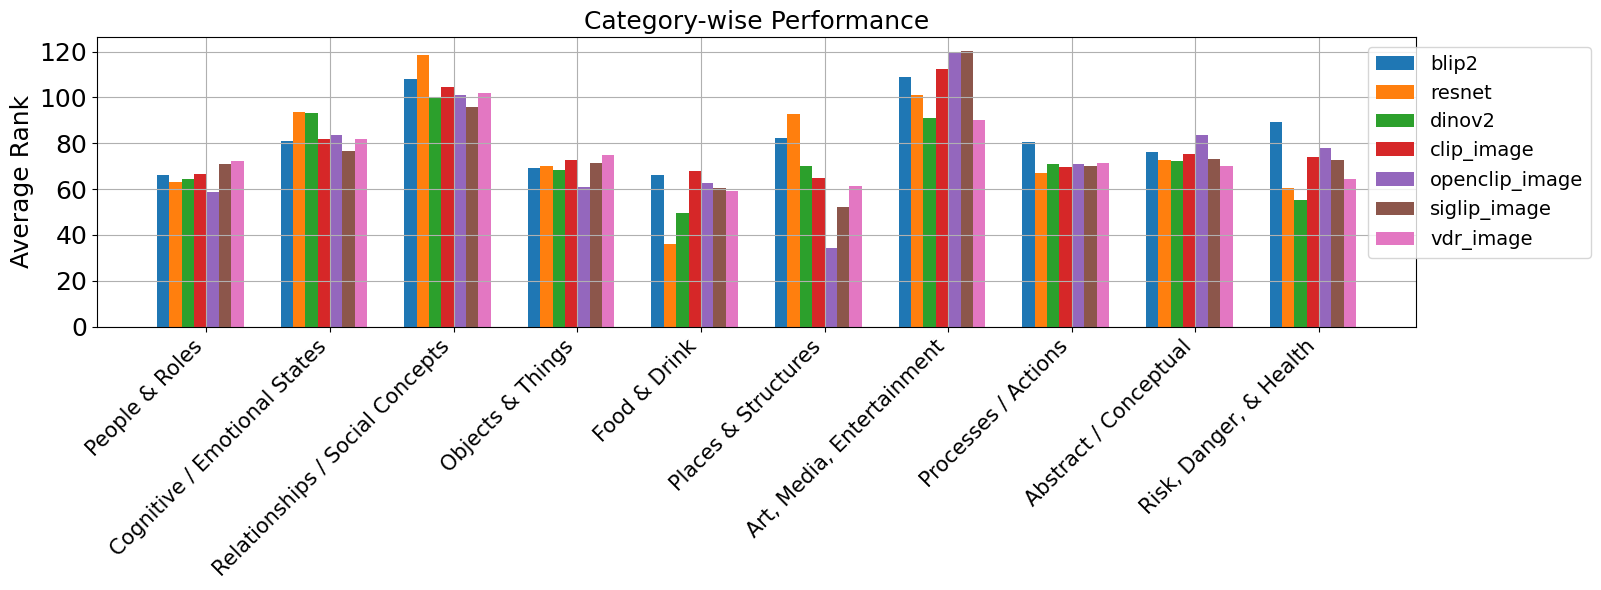

In [ ]:
# ============================
# COMBINE ALL IMAGE EMBEDDINGS
# ============================
all_ranks_img_full = dict(all_ranks_img)  # image-only models
for k,v in all_ranks_mm.items():
    if k.endswith("_image"):
        all_ranks_img_full[k] = v

# ============================
# CATEGORY BAR PLOTS for ALL image models
# ============================
category_scores_img = defaultdict(dict)
concept_to_category = {c: cat for cat, clist in concept_categories.items() for c in clist}

for model, ranks in all_ranks_img_full.items():
    cat_ranks = defaultdict(list)
    for i, rank in enumerate(ranks):
        concept = concepts_sorted[i % len(concepts_sorted)]
        cat = concept_to_category.get(concept, "Other")
        cat_ranks[cat].append(rank)
    for cat, vals in cat_ranks.items():
        category_scores_img[cat][model] = np.mean(vals)

categories = list(category_scores_img.keys())
x = np.arange(len(categories))
width = 0.1

plt.figure(figsize=(16,6))
for i, model in enumerate(all_ranks_img_full.keys()):
    heights = [category_scores_img[cat].get(model, np.nan) for cat in categories]
    plt.bar(x + i*width, heights, width, label=model)

plt.xticks(x + width*len(all_ranks_img_full)/2, categories, rotation=45, ha="right", fontsize=15)
plt.ylabel("Average Rank", fontsize=18)
plt.yticks(fontsize=18)
plt.title("Category-wise Performance", fontsize=18)
plt.legend(bbox_to_anchor=(1.14, 1), loc='upper right', fontsize=14)

plt.grid(True)
plt.tight_layout()
plt.show()


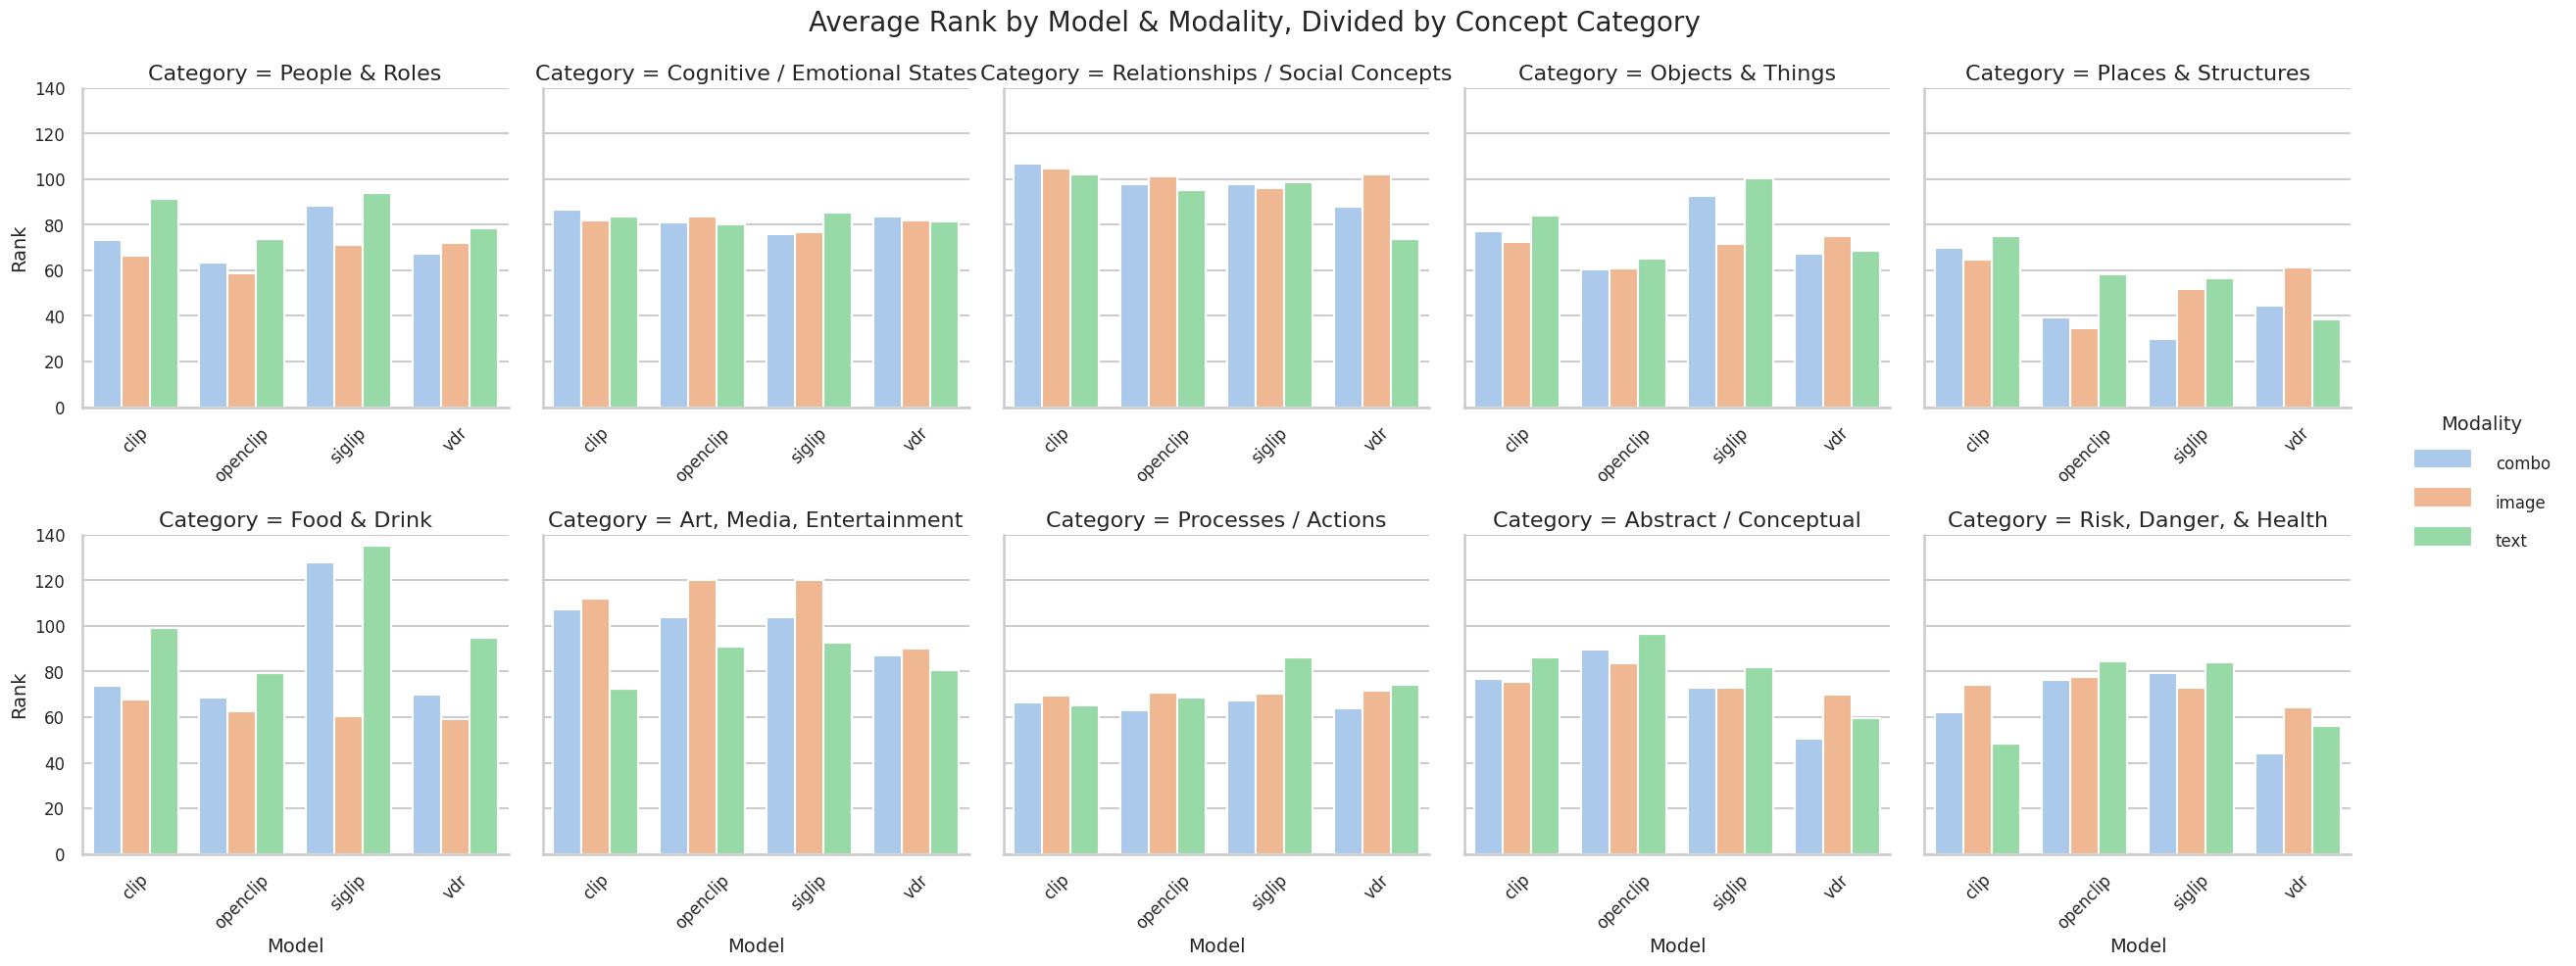

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# make all text bigger globally
sns.set_context("talk", font_scale=1.3)
sns.set_style("whitegrid")

# build DataFrame for seaborn
rows = []
for model_mod, ranks in all_ranks_mm.items():
    model, modality = model_mod.split("_",1)
    for i, rank in enumerate(ranks):
        concept = concepts_sorted[i % len(concepts_sorted)]
        category = concept_to_category.get(concept, "Other")
        rows.append({
            "Category": category,
            "Model": model,
            "Modality": modality,
            "Rank": rank
        })
df_long = pd.DataFrame(rows)

# compute average ranks
df_summary = df_long.groupby(["Category","Model","Modality"])["Rank"].mean().reset_index()

# enforce category order
cat_order = list(concept_categories.keys())
df_summary["Category"] = pd.Categorical(df_summary["Category"], categories=cat_order, ordered=True)

# exact number of colors = number of modalities
palette = sns.color_palette("pastel", 3)

# plot with fixed y-axis, 5x2 grid
g = sns.catplot(
    data=df_summary, kind="bar",
    x="Model", y="Rank", hue="Modality",
    col="Category", col_wrap=5,
    height=5, aspect=1,
    palette=palette,
    legend_out=True,
    sharey=True
)
g.set(ylim=(0,140))

# force x-ticks on ALL rows, larger font
for ax in g.axes.flatten():
    ax.tick_params(axis='x', which='both', labelrotation=45, labelbottom=True, labelsize=12)
    ax.tick_params(axis='y', labelsize=12)
    ax.set_xlabel(ax.get_xlabel(), fontsize=14)
    ax.set_ylabel(ax.get_ylabel(), fontsize=14)
    ax.title.set_size(16)

# bigger legend text
g._legend.set_title("Modality", prop={"size":14})
for text in g._legend.get_texts():
    text.set_fontsize(12)

g.fig.subplots_adjust(hspace=0.4, top=0.9)
g.fig.suptitle("Average Rank by Model & Modality, Divided by Concept Category", fontsize=20)

plt.show()


In [ ]:
import pandas as pd
import numpy as np

# build the multi-index DataFrame
rows = []
for model, metrics in multimodal_results.items():
    for modality in ['image','text','combo']:
        if modality in metrics["Average Rank"]:
            rows.append({
                "Model": model,
                "Modality": modality,
                "Average Rank": metrics["Average Rank"].get(modality, np.nan),
                "Top-5 Accuracy": metrics["Top-5 Accuracy"].get(modality, np.nan),
                "MRR": metrics["MRR"].get(modality, np.nan)
            })

df_multi = pd.DataFrame(rows).set_index(["Model","Modality"])
df_multi = df_multi.round(2)  # round for clarity

# show
print("\n✅ Multi-dimension metrics table:")
print(df_multi)



✅ Multi-dimension metrics table:
                   Average Rank  Top-5 Accuracy   MRR
Model    Modality                                    
clip     image            76.26            2.22  0.04
         text             81.53            4.44  0.04
         combo            78.42            2.22  0.03
openclip image            74.21            2.78  0.04
         text             78.55            3.33  0.04
         combo            73.59            6.67  0.05
siglip   image            73.89            2.78  0.03
         text             89.84            3.33  0.03
         combo            80.28            6.11  0.04
vdr      image            74.72            2.22  0.03
         text             71.46            3.89  0.04
         combo            67.19            3.89  0.04
